# Chapter 10 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

 Load required packages

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Example: Gym trial conversions

 Implement the resampling procedure

In [3]:
random.seed(123)
box = [1, 0, 0, 0]
n_ones = []
for _ in range(1000):
    # sample 165 times with replacement
    n_ones.append(sum(random.choices(box, k=165)))
n_ones = np.array(n_ones)
count_above = sum(n_ones >= 53)
p_value = count_above / len(n_ones)
print(f"count above: {count_above}")
print(f"p-value: {p_value:.3f}")

count above: 21
p-value: 0.021


 Plot the histogram

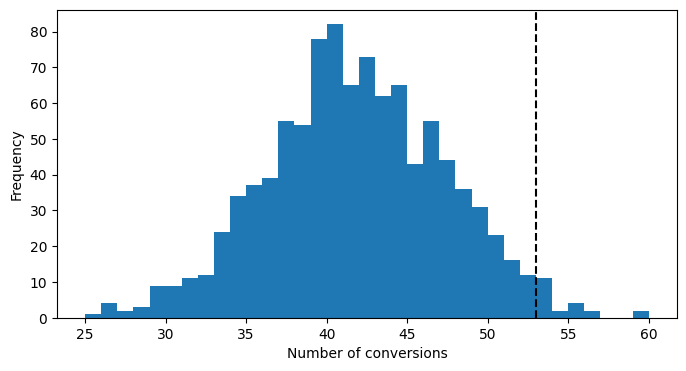

In [4]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(n_ones, bins=range(25, 61))
ax.axvline(53, color="black", linestyle="dashed")
ax.set_xlabel("Number of conversions")
ax.set_ylabel("Frequency")
plt.show()

# Example: Humidifier moisture output

 Load the dataset

In [5]:
data = pd.read_csv("vendors.txt", header=None)
vendorA = data[0].to_numpy()[:12]
vendorB = data[0].to_numpy()[12:]

## Resampling procedure for the confidence interval

In [6]:
rng = np.random.default_rng(seed=123)
box = list(vendorA)
means = []
for _ in range(1000):
    resample = rng.choice(box, 12, replace=True)
    means.append(np.mean(resample))
ci_interval = np.percentile(means, [5, 95])
print(ci_interval.round(2))

[13.51 14.18]


 Plot the histogram

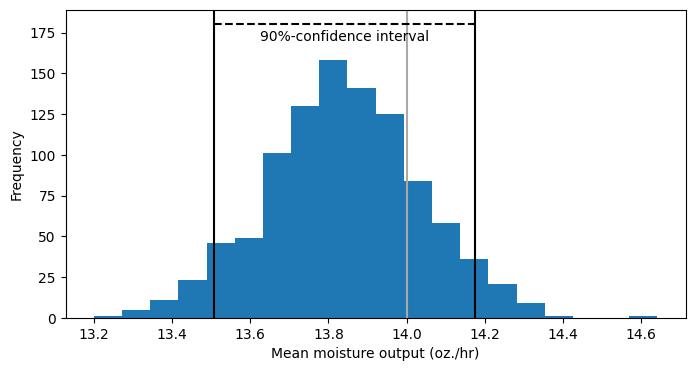

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(means, bins=20)
ax.axvline(14, color="darkgrey")
ax.set_xlabel("Mean moisture output (oz./hr)")
ax.set_ylabel("Frequency")

for ci in ci_interval:
    ax.axvline(ci, color="black")
ax.plot(ci_interval, [180, 180], color="black", linestyle="--")
ax.text(ci_interval.mean(), 170, "90%-confidence interval", ha="center")
plt.show()

## Formula approach for the confidence interval

In [8]:
ci_interval = stats.t.interval(0.9, 11, loc=vendorA.mean(), scale=vendorA.std(ddof=1)/np.sqrt(12))
np.array(ci_interval).round(2)

array([13.48, 14.21])

In [9]:
observed = pd.DataFrame({
    "B": {1: 15, 2: 3, 3: 11},
    "I": {1: 24, 2: 5, 3: 1},
}).transpose()

# use scipy.stats.chi2_contingency to determine expected values
_, _, _, expected = stats.chi2_contingency(observed)
print(expected)
# calculate sum of absolute differences
np.abs(observed - expected).sum().sum()

[[19.16949153  3.93220339  5.89830508]
 [19.83050847  4.06779661  6.10169492]]


20.40677966101695

# Chi Square Example

In [10]:
chi2, p_value, dof, expected = stats.chi2_contingency(observed)
stats.chi2_contingency(observed)

(10.896437518420278,
 0.004303964263659824,
 2,
 array([[19.16949153,  3.93220339,  5.89830508],
        [19.83050847,  4.06779661,  6.10169492]]))

# Benford's law

 Following the equation in the Wikipedia article, we can

   digit  expected
0      1  0.301030
1      2  0.176091
2      3  0.124939
3      4  0.096910
4      5  0.079181
5      6  0.066947
6      7  0.057992
7      8  0.051153
8      9  0.045757


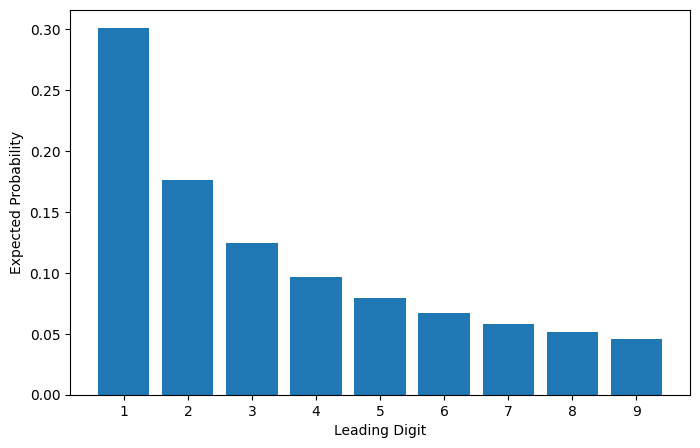

In [11]:
digits = np.arange(1, 10)
benford = pd.DataFrame({
    "digit": digits,
    "expected": np.log10(1 + 1/digits),
})
print(benford)
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(benford["digit"], benford["expected"])
ax.set_xticks(digits)
ax.set_xlabel("Leading Digit")
ax.set_ylabel("Expected Probability")
plt.show()

# Resampling distributions of interior digits

 Look at an example of a resampling distribution of interior digits.

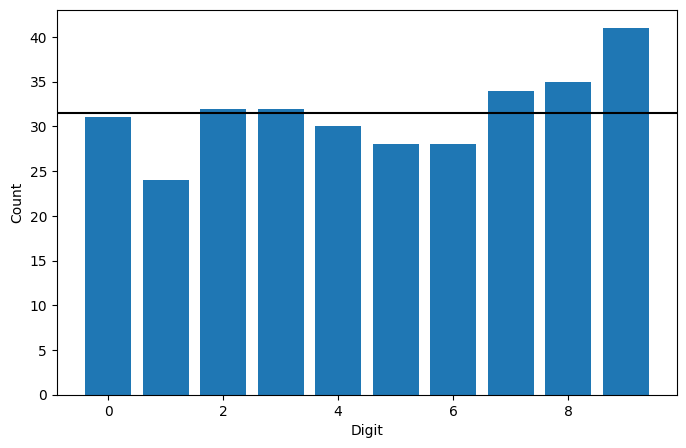

In [12]:
from collections import Counter

random.seed(123)
box = list(range(10))
random.shuffle(box)
resample = random.choices(box, k=315)
counts = Counter(resample)
df = pd.DataFrame({
    "count": [counts[i] for i in range(10)],
}, index=range(10))

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(df.index, df["count"])
ax.axhline(31.5, color="black")
ax.set_xlabel("Digit")
ax.set_ylabel("Count")
plt.show()

 Resampling experiment

In [13]:
random.seed(123)
box = list(range(10))
differences = []
for _ in range(10_000):
    random.shuffle(box)
    resample = random.choices(box, k=315)
    counts = Counter(resample)
    df = pd.DataFrame({
        "count": [counts[i] for i in range(10)],
    }, index=range(10))
    differences.append(sum(abs(df["count"] - 31.5)))
differences = np.array(differences)
above_216 = sum(differences >= 216)
p_value = above_216 / len(differences)

print(f"Number of resamples with sum of absolute deviations >= 216: {above_216}")
print(f"p-value = {p_value:.4f}")

Number of resamples with sum of absolute deviations >= 216: 0
p-value = 0.0000
